# Comparing clustering with DEC and with benchmark

In [ ]:
# import the necessary packages
from sklearn.metrics import classification_report, silhouette_score,\
    accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np
import sys
import os, struct
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros, float32
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from six.moves import cPickle as pickle
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from tabulate import tabulate

%matplotlib inline

In [2]:
# Load processed dataset from pickle file

pickle_file = 'data/roofs_dataset_processed.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    buildings = save['buildings']
    bg_dataset = save['bg_dataset']
    roof_dataset_orig = save['roof_dataset_orig']
    roof_dataset = save['roof_dataset']
    del save  # hint to help gc free up memory

In [3]:
# Load labelled data

pickle_file = 'data/labelled_samples.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    roofs_train_sample = save['train_sample']
    roofs_test_sample = save['test_sample']
    del save  # hint to help gc free up memory

In [4]:
sample_dataset = roof_dataset[np.array(roofs_train_sample['ind'])]
y_true = np.array(roofs_train_sample['lab'])

In [12]:
# Load results from benchmark segmentation

pickle_file = 'data/roofs_bmk_results.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    bmk_clus_m = save['bmk_clus_m']
    bmk_clus = save['bmk_clus']
    y_pred_bmk = save['y_pred_bmk']
    del save  # hint to help gc free up memory

In [13]:
# Load results from DEC segmentation

pickle_file = 'data/roofs_DEC_results.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    dec_clus_m = save['dec_clus_m']
    dec_clus = save['dec_clus']
    y_pred_dec = save['y_pred_dec']
    del save  # hint to help gc free up memory

In [56]:
# to find the best correspondance between the clustering and the labelling
def find_correspondance(y_true,y_pred):
    mappings = list(itertools.permutations(range(y_true.max()+1), y_pred.max()+1))
    accs = []
    for mapping in mappings:
        y_pred_map = np.array([mapping[y] for y in y_pred])
        accs.append(np.sum(y_true == y_pred_map))
    best_mapping = mappings[np.argmax(accs)]
    return np.array([best_mapping[y] for y in y_pred])

In [57]:
y_pred_dec_cor = find_correspondance(y_true,y_pred_dec)
y_pred_bmk_cor = find_correspondance(y_true,y_pred_bmk)

In [58]:
y_true

array([2, 2, 1, 0, 4, 1, 1, 0, 3, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2,
       2, 1, 4, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 3, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 0, 0, 3, 2, 1, 2, 2, 2, 3,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 3, 0, 2,
       1, 1, 3, 1, 1, 3, 1, 3, 1, 2, 3, 2, 0, 1, 0, 3, 0, 1, 2, 0, 0, 1, 2,
       3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 2, 2, 1, 1, 2, 1, 4, 0, 1, 1, 0, 1, 1, 2, 1])

In [59]:
y_pred_bmk_cor

array([2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [60]:
y_pred_dec_cor

array([2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1])

In [61]:
dec_confusion_matrix = confusion_matrix(y_true, y_pred_dec_cor)
bmk_confusion_matrix = confusion_matrix(y_true, y_pred_bmk_cor)

In [62]:
print tabulate(dec_confusion_matrix,tablefmt="pipe")

|---:|---:|---:|--:|--:|
| 10 | 12 |  5 | 0 | 0 |
| 11 | 72 |  9 | 0 | 0 |
|  0 | 17 | 44 | 0 | 0 |
|  4 |  8 |  4 | 0 | 0 |
|  0 |  1 |  3 | 0 | 0 |


In [63]:
print(pd.DataFrame(dec_confusion_matrix))

    0   1   2  3  4
0  10  12   5  0  0
1  11  72   9  0  0
2   0  17  44  0  0
3   4   8   4  0  0
4   0   1   3  0  0


In [64]:
print tabulate(bmk_confusion_matrix,tablefmt="pipe")

|--:|---:|---:|--:|--:|
| 0 | 25 |  2 | 0 | 0 |
| 0 | 86 |  6 | 0 | 0 |
| 0 |  5 | 56 | 0 | 0 |
| 0 | 11 |  5 | 0 | 0 |
| 0 |  3 |  1 | 0 | 0 |


In [65]:
print(pd.DataFrame(bmk_confusion_matrix))

   0   1   2  3  4
0  0  25   2  0  0
1  0  86   6  0  0
2  0   5  56  0  0
3  0  11   5  0  0
4  0   3   1  0  0


In [66]:
# the prediction of a constant model (the most frequent label -gable- is returned for any point)
(values,counts) = np.unique(y_true,return_counts=True)
ind=np.argmax(counts)
y_pred_const = np.array([values[ind]]*len(y_true))

In [67]:
# the prediction is based on the clustering of the datapoints in the space (Hsym, Vsym)
y_pred_sym = np.array(pd.read_csv('data/sample_labels_init.csv').sort_values(by=['ind'])['lab'])

In [70]:
dec_acc_score = accuracy_score(y_true, y_pred_dec_cor)
bmk_acc_score = accuracy_score(y_true, y_pred_bmk_cor)
const_acc_score = accuracy_score(y_true, y_pred_const)
sym_acc_score = accuracy_score(y_true, y_pred_sym)

In [71]:
dec_acc_score, bmk_acc_score, sym_acc_score, const_acc_score

(0.63, 0.70999999999999996, 0.53500000000000003, 0.46000000000000002)

In [80]:
def show_clus_vs_lab(dataset, y_true, y_pred):
    '''Displays a sample of images from a dataset on a grid of the HSV space.'''
    fig = plt.figure(figsize=(20, 20))

    types = ['flat', 'gable', 'pyramid_or_hip', 'complex', 'not_a_roof']
    to_rgb=len(dataset[0].shape)==3
    outer = gridspec.GridSpec(np.max(y_true)+1, np.max(y_pred)+1, wspace=0.2, hspace=0.2)
    
    for i in range(np.max(y_true)+1):
        for j in range(np.max(y_pred)+1):
            inner = gridspec.GridSpecFromSubplotSpec(5, 5,
                    subplot_spec=outer[i*(np.max(y_pred)+1)+j], wspace=0.1, hspace=0.1)
            sel_dataset = dataset[(y_true==i) & (y_pred==j)]

            for k in range(25):
                ax = plt.Subplot(fig, inner[k])
                try:
                    img = sel_dataset[k]
                except:
                    img = np.ones(dataset[0].shape, dtype=np.uint8)* 255
                if to_rgb:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                #ax.axis("off")
                ax.get_xaxis().set_ticks([])
                ax.get_yaxis().set_ticks([])
                if ax.colNum==2 and ax.is_first_row() and i==0:
                    ax.set_title(types[j])
                if ax.rowNum==2 and ax.is_first_col() and j==0:
                    ax.set_ylabel(types[i])
                fig.add_subplot(ax)
    plt.show()

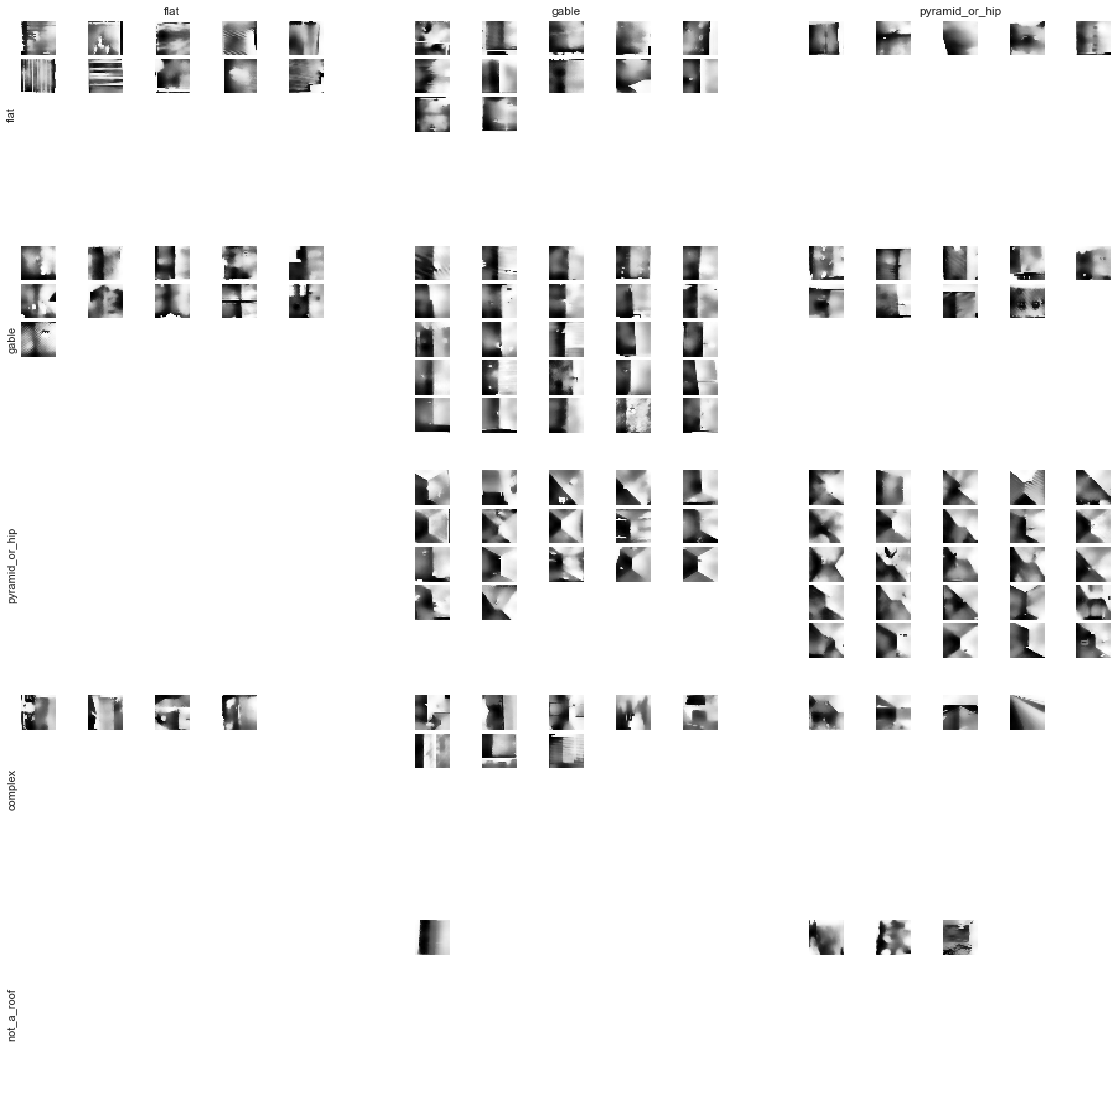

In [81]:
show_clus_vs_lab(sample_dataset, y_true, y_pred_dec_cor)

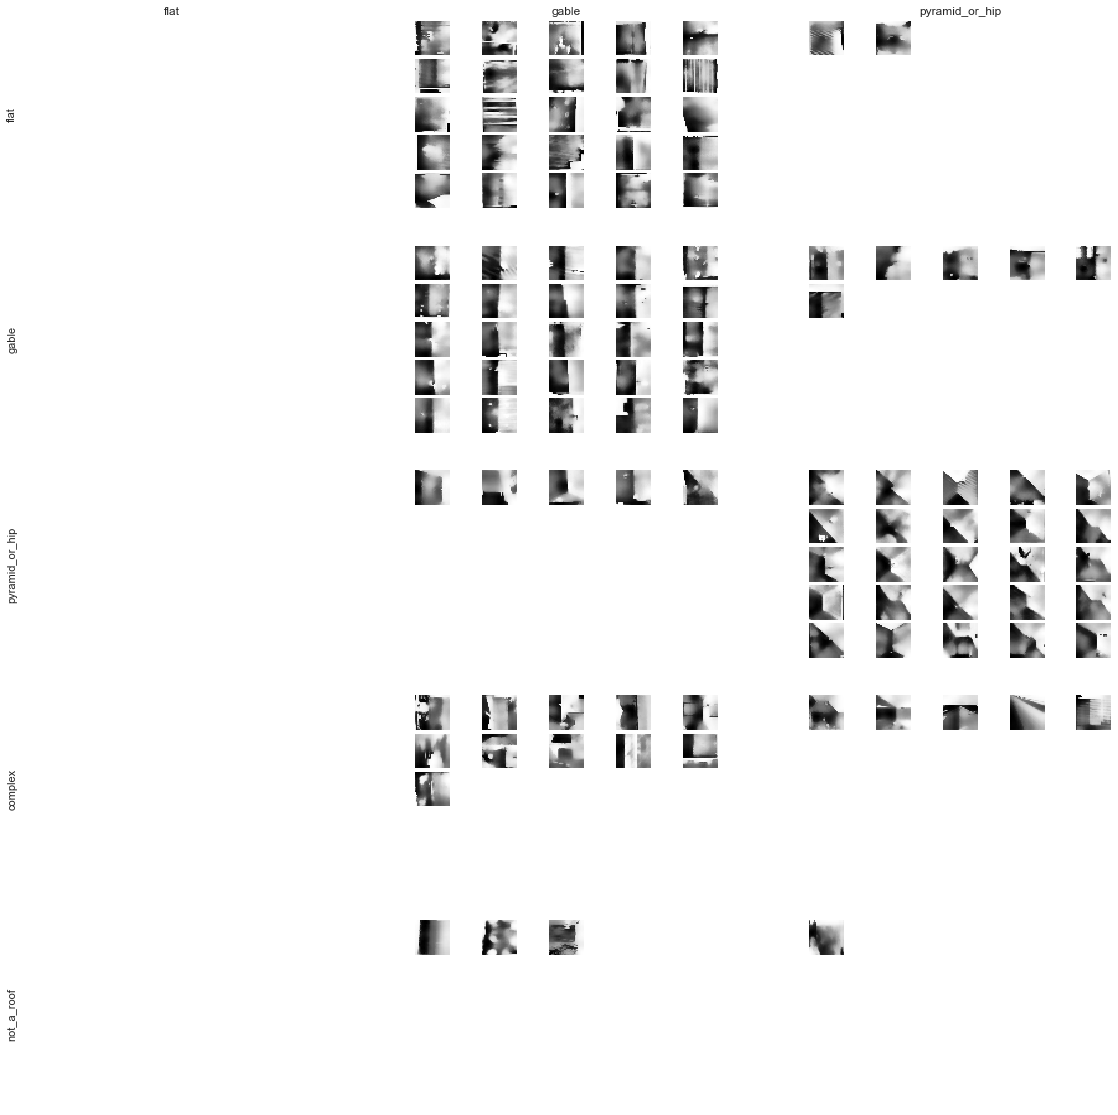

In [82]:
show_clus_vs_lab(sample_dataset, y_true, y_pred_bmk_cor)